## This is an analysis of the 11-35 years of experience from our Jobs dataset.This data was scraped from the MyJobmag website.

In [1]:
#Lets import the libraries 
import csv
import numpy as np
import pandas as pd

# lets read in the titles data and parse in the titles as a list
f=open("D:/dataAnalysis/jobs/Jobs/titles.text","r")
x=f.read()
titles=x.split("\n")
job_titles=titles[1::2]
print(len(job_titles))



794


In [2]:
#we will do the same and get the dates
f=open("D:/dataAnalysis/jobs/Jobs/dates.text","r")
x2=f.read()
dates=x2.split(",")
dates1=dates[:1]
dates.pop(0)
# print(dates)
date_string=''.join(map(str,dates1))

dates_split=date_string.split(" ")
dates_split.pop(0)
dates_split.remove('December')
final_dates=dates_split+dates
print(len(final_dates))

794


In [3]:
#now lets read in the jobs data and parse it
f=open("D:/dataAnalysis/jobs/Jobs/data_list_highExperiene.text","r")
x3=f.read()
jobs=x3.split("\n")
#with the jobs data now lets split the information by category
job_qualification=jobs[1::5]
job_type=jobs[::5]
job_experience=jobs[2::5]
job_location=jobs[3::5]
job_field=jobs[4::5]
# print(job_field)




In [4]:
#Lets now create a dataframe with this information
zipped=list(zip(job_titles,final_dates,job_qualification,job_type,job_experience,job_location,job_field))
jobs_df=pd.DataFrame(zipped,columns=['Title','Date','Qualification','Type','Experience','Location','Field'])
print(len(jobs_df))

791


## Perfect! Now we have a dataframe of the jobs as scraped and now we can start with the analysis!

In [5]:
#We have 791 records which is expected from the scraped data. Lets see if we can get some patterns from the data
jobs_df.shape

(791, 7)

In [6]:
jobs_df.dtypes

Title            object
Date             object
Qualification    object
Type             object
Experience       object
Location         object
Field            object
dtype: object

In [ ]:
#We will have to change some of the data types to make it easier to analyse the data

In [7]:
#I have done some changes in excel to the date column. Let us do some more analysis
jobs_amended=pd.read_csv("jobs_high.csv")

In [8]:
#We have done some changes in excel to the date column to make it easier to parse and now it is in date format
import datetime

jobs_amended['Date']=pd.to_datetime(jobs_amended['Date'])
jobs_amended.dtypes

Unnamed: 0                int64
Title                    object
Date             datetime64[ns]
Qualification            object
Type                     object
Experience               object
Location                 object
Field                    object
dtype: object

In [9]:
#the experience column has a string added to it and we are going to remove it and change it to integer
jobs_amended['Experience']=jobs_amended['Experience'].str.replace("years","")

In [10]:
#the column cannot be changed to int because some values have given a range in years of experience.
import numpy as np
jobs_range=jobs_amended[jobs_amended['Experience'].str.contains("-")]



In [19]:
jobs_range

,Unnamed: 0,Title,Date,Qualification,Type,Experience,Location,Field
4,4,Head of Finance and Accounting Kenya at Master...,2021-11-11,BA/BSc/HND,Full Time,13 - 15,Nairobi,Finance / Accounting / Audit
6,6,Assistant General Manager - Personal Banking a...,2021-11-28,BA/BSc/HND,Full Time,18 - 12,Nairobi,Banking
48,48,Group Treasury and Tax Manager (Nairobi) at Sa...,2021-08-12,BA/BSc/HND,Full Time,13 - 20,Nairobi,Sales / Marketing / Retail / Business Developm...
120,120,"Chief Gender, Diversity, Equality, and Inclusi...",2021-03-24,BA/BSc/HND,Full Time,15 - 20,Nairobi,ICT / Computer
143,143,"Chief of Party, Kenya Tusome Early Grade Learn...",2021-02-12,BA/BSc/HND,Full Time,15 - 20,Nairobi,Media / Advertising / Branding
156,156,Country Director at African Wildlife Foundation,2021-01-21,BA/BSc/HND,Full Time,12 - 15,Nairobi,Engineering / Technical
173,173,"General Manager, Renewable Energy, Research an...",2020-12-01,BA/BSc/HND,Full Time,12 - 15,Nairobi,Administration / Secretarial
345,345,Commission Secretary/CEO at National Cohesion ...,2020-02-03,BA/BSc/HND,Full Time,12 - 15,Nairobi,Administration / Secretarial
395,395,Assistant Director (Finance) at Kenya Industri...,2019-07-01,"MBA/MSc/MA , PhD/Fellowship",Full Time,12 - 13,Kisumu,Human Resources / HR
414,414,Finance Officer at South Eastern Kenya University,2019-04-11,BA/BSc/HND,Full Time,21 - 27,Nairobi,Sales / Marketing / Retail / Business Developm...


In [26]:
jobs_amended['Experience']=jobs_amended['Experience'].astype(float)
jobs_amended.head

<bound method NDFrame.head of      Unnamed: 0                                              Title       Date  \
0             0  Chief of Party at Kenya AIDS NGOs Consortium (... 2021-11-17   
1             1  Deputy Chief of Party at Kenya AIDS NGOs Conso... 2021-11-15   
2             2  Head of Jameel Observatory at International Li... 2021-11-12   
3             3  Head of Jameel Observatory at International Li... 2021-11-11   
5             5  Account Executive - Telco - Emerging Africa at... 2021-11-05   
..          ...                                                ...        ...   
785         785  Chief Manager, Finance and Administration at H... 2016-09-30   
786         786  Shop Attendant/Merchandiser at Indepth Researc... 2016-09-30   
788         788          Junior Debt Collectors at Flexi-Personnel 2016-09-16   
789         789  Head of Legal Division at Kenya National Burea... 2016-09-13   
790         790               RSC Director at Church World Service 2016-09-09  

In [30]:
jobs_change=pd.read_csv("jobs_range.csv")
jobs_change.head

<bound method NDFrame.head of     Unnamed: 0  Unnamed: 0.1  \
0            4             4   
1            6             6   
2           48            48   
3          120           120   
4          143           143   
5          156           156   
6          173           173   
7          345           345   
8          395           395   
9          414           414   
10         430           430   
11         446           446   
12         462           462   
13         463           463   
14         482           482   
15         520           520   
16         558           558   
17         559           559   
18         584           584   
19         597           597   
20         602           602   
21         608           608   
22         628           628   
23         629           629   
24         687           687   
25         690           690   
26         691           691   
27         692           692   
28         723           723   
29        

In [32]:
jobs_new=jobs_amended.append(jobs_change,ignore_index=True)
jobs_new.head

<bound method NDFrame.head of      Unnamed: 0                                              Title  \
0             0  Chief of Party at Kenya AIDS NGOs Consortium (...   
1             1  Deputy Chief of Party at Kenya AIDS NGOs Conso...   
2             2  Head of Jameel Observatory at International Li...   
3             3  Head of Jameel Observatory at International Li...   
4             5  Account Executive - Telco - Emerging Africa at...   
..          ...                                                ...   
786         692        HR Interns at Kenya Revenue Authority (KRA)   
787         723  Assistant Director, Corporate Communications a...   
788         739                      General Manager at Aon Hewitt   
789         746  University Librarian at Kibabii University Col...   
790         787   Chief Transactions Manager at Hawkins Associates   

                    Date            Qualification       Type  Experience  \
0    2021-11-17 00:00:00               BA/BSc/HND  Fu

In [34]:
#we now have the experience column in float values and now lets change it to integer values
jobs_new['Experience']=jobs_new['Experience'].astype(int)
jobs_new.head

<bound method NDFrame.head of      Unnamed: 0                                              Title  \
0             0  Chief of Party at Kenya AIDS NGOs Consortium (...   
1             1  Deputy Chief of Party at Kenya AIDS NGOs Conso...   
2             2  Head of Jameel Observatory at International Li...   
3             3  Head of Jameel Observatory at International Li...   
4             5  Account Executive - Telco - Emerging Africa at...   
..          ...                                                ...   
786         692        HR Interns at Kenya Revenue Authority (KRA)   
787         723  Assistant Director, Corporate Communications a...   
788         739                      General Manager at Aon Hewitt   
789         746  University Librarian at Kibabii University Col...   
790         787   Chief Transactions Manager at Hawkins Associates   

                    Date            Qualification       Type  Experience  \
0    2021-11-17 00:00:00               BA/BSc/HND  Fu

## We have a final dataset! What questions can we ask from the data we have?
### Average level of experience
### Most common fields of study
### Differences over time for the differences in industries

In [37]:
#what is the average level of experience
jobs_new['Experience'].describe()

count    791.000000
mean      14.093552
std        2.740941
min       11.000000
25%       12.000000
50%       15.000000
75%       15.000000
max       35.000000
Name: Experience, dtype: float64

<AxesSubplot:>

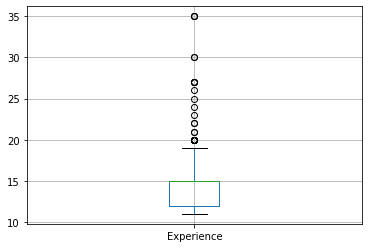

In [38]:
#There is an average of 14 years of experience for jobs at the highest level with 15 years being the 75th percentile
jobs_new.boxplot(column='Experience',return_type='axes')

In [69]:
#There are some outliers and we are going to see what those values are
jobs_new[jobs_new['Experience']>20]

,Unnamed: 0,Title,Date,Qualification,Type,Experience,Location,Field,Unnamed: 0.1
292,299,Deputy Director / Senior Superintending Engine...,2020-04-23,BA/BSc/HND,Full Time,22,Nairobi,Administration / Secretarial,NaN
463,477,Director of Warehousing at Fargo Courier,2018-08-20,BA/BSc/HND,Full Time,25,Nairobi,Sales / Marketing / Retail / Business Developm...,NaN
541,557,Head Of Credit at Human Asset Consultants,2018-03-21,BA/BSc/HND,Full Time,35,Nairobi,Driving,NaN
556,574,"Senior Technical Advisor, Regional Policy Envi...",2018-01-29,BA/BSc/HND,Full Time,35,Nyeri,Security / Intelligence,NaN
583,604,Group CFO- INSURANCE at RTS GLOBAL PARTNERS,2017-10-12,KCSE,Full Time,30,Nairobi,Administration / Secretarial,NaN
699,728,Chief Technology Officer at Oxygene8 Group,2017-02-02,"BA/BSc/HND , MBA/MSc/MA",Full Time,35,Nairobi,Administration / Secretarial,NaN
751,782,Chairperson at Ethics and Anti-Corruption Comm...,2016-10-05,KCSE,Full Time,30,Nairobi,Sales / Marketing / Retail / Business Developm...,NaN
754,785,"Chief Manager, Finance and Administration at H...",2016-09-30,"Diploma , KCSE",Full Time,21,Nairobi,Sales / Marketing / Retail / Business Developm...,NaN
768,414,Finance Officer at South Eastern Kenya University,2019-04-11,BA/BSc/HND,Full Time,24,Nairobi,Sales / Marketing / Retail / Business Developm...,414.0
769,430,Risk & Quality Assurance Manager at Geothermal...,2019-02-07,BA/BSc/HND,Full Time,22,Nairobi,Administration / Secretarial,430.0


In [ ]:
#is there any correlation between the level of experience and the field?
#Or rather what is the biggest factor influencing the level of experience?

In [57]:
#Which are the most popular industries to work in?
#Lets see the 10 most popular and 10 least popular
jobs_new['Field'].value_counts()[:10]

Administration / Secretarial                          226
Finance / Accounting / Audit                           91
Engineering / Technical                                66
NGO/Non-Profit                                         54
Sales / Marketing / Retail / Business Development      41
Education / Teaching                                   33
Human Resources / HR                                   32
Law / Legal                                            27
Procurement / Store-keeping / Supply Chain             21
ICT / Computer                                         20
Name: Field, dtype: int64

In [ ]:
#Are these the most popular sectors to be in?

<AxesSubplot:>

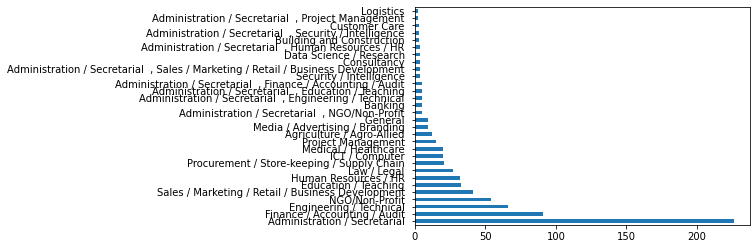

In [59]:
#We will use a barplot to see the least and most popular
jobs_new['Field'].value_counts()[:30].plot(kind='barh')

In [53]:
import datetime
jobs_new['Date']=pd.to_datetime(jobs_new['Date'])
jobs_new.dtypes

Unnamed: 0                int64
Title                    object
Date             datetime64[ns]
Qualification            object
Type                     object
Experience                int32
Location                 object
Field                    object
Unnamed: 0.1            float64
dtype: object

In [ ]:
#There are 17 values we can count as outliers in the dataset and they warrant investigation
#How many jobs were there per year?
import matplotlib.pyplot as plt
import datetime

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(jobs_new['Date'].dt.year,
       jobs_new['Field'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Count",
       title="Jobs by date")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()



<AxesSubplot:ylabel='Date'>

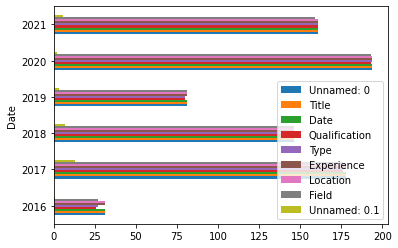

In [63]:
#Lets try to visualize jobs per year
jobs_new.groupby(jobs_new['Date'].dt.year,).count().plot(kind='barh')

In [ ]:
#The number of jobs created runs counter to what is expected given the Covid-19 pandemic and 
# the 2017 elections. Does that mean that jobs at the highest level are not affected by external factors

In [65]:
#Lets see the types of jobs advertised
jobs_new['Type'].value_counts()

Full Time               770
Contract                 11
Remote                    1
Contract , Full Time      1
Name: Type, dtype: int64